<a href="https://colab.research.google.com/github/sizhky/icevision/blob/master/dental-notebooks/MMDetection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive') 

Mounted at /content/drive


In [ ]:
!ls

sample_data  test6  test6.zip


In [ ]:
!wget https://raw.githubusercontent.com/airctic/icevision/master/install_colab.sh
!bash install_colab.sh

--2021-08-07 03:54:12--  https://raw.githubusercontent.com/airctic/icevision/master/install_colab.sh
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.111.133, 185.199.110.133, 185.199.108.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.111.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 1244 (1.2K) [text/plain]
Saving to: ‘install_colab.sh’

install_colab.sh    100%[===================>]   1.21K  --.-KB/s    in 0s      

2021-08-07 03:54:13 (36.8 MB/s) - ‘install_colab.sh’ saved [1244/1244]

Installing icevision + dependencices for CUDA 10
Uninstalling some dependencies to prevent errors
Found existing installation: torchvision 0.10.0+cu102
Uninstalling torchvision-0.10.0+cu102:
  Successfully uninstalled torchvision-0.10.0+cu102
Found existing installation: fastai 1.0.61
Uninstalling fastai-1.0.61:
  Successfully uninstalled fastai-1.0.61
Installing some dependencies to prevent errors
     |██

INFO     - Downloading default `.ttf` font file - SpaceGrotesk-Medium.ttf from https://raw.githubusercontent.com/airctic/storage/master/SpaceGrotesk-Medium.ttf to /root/.icevision/fonts/SpaceGrotesk-Medium.ttf | icevision.visualize.utils:get_default_font:69
INFO     - Downloading mmdet configs | icevision.models.mmdet.download_configs:download_mmdet_configs:31


0B [00:00, ?B/s]

WARNING  - This function will be deprecated, instantiate the concrete classes instead: `VOCBBoxParser`, `VOCMaskParser` | icevision.parsers.voc_parser:voc:18


  0%|          | 0/1000 [00:00<?, ?it/s]

INFO     - Autofixing records | icevision.parsers.parser:parse:136


  0%|          | 0/800 [00:00<?, ?it/s]

AUTOFIX-SUCCESS - (record_id: 106) - Clipping bbox ymax from 942 to image height 940 (Before: <BBox (xmin:1280, ymin:912, xmax:1315, ymax:942)>) | icevision.utils.logger_utils:autofix_log:17
AUTOFIX-SUCCESS - (record_id: 106) - Clipping bbox ymax from 942 to image height 940 (Before: <BBox (xmin:1351, ymin:912, xmax:1386, ymax:942)>) | icevision.utils.logger_utils:autofix_log:17
AUTOFIX-SUCCESS - (record_id: 105) - Clipping bbox ymax from 764 to image height 759 (Before: <BBox (xmin:1027, ymin:740, xmax:1055, ymax:764)>) | icevision.utils.logger_utils:autofix_log:17
AUTOFIX-SUCCESS - (record_id: 105) - Clipping bbox ymax from 764 to image height 759 (Before: <BBox (xmin:1083, ymin:740, xmax:1112, ymax:764)>) | icevision.utils.logger_utils:autofix_log:17
AUTOFIX-SUCCESS - (record_id: 973) - Clipping bbox ymax from 990 to image height 987 (Before: <BBox (xmin:1337, ymin:958, xmax:1375, ymax:990)>) | icevision.utils.logger_utils:autofix_log:17
AUTOFIX-SUCCESS - (record_id: 973) - Clipping

  0%|          | 0/200 [00:00<?, ?it/s]

AUTOFIX-SUCCESS - (record_id: 907) - Clipping bbox ymax from 829 to image height 827 (Before: <BBox (xmin:1122, ymin:803, xmax:1152, ymax:829)>) | icevision.utils.logger_utils:autofix_log:17
AUTOFIX-SUCCESS - (record_id: 907) - Clipping bbox ymax from 829 to image height 827 (Before: <BBox (xmin:1183, ymin:803, xmax:1214, ymax:829)>) | icevision.utils.logger_utils:autofix_log:17
AUTOFIX-SUCCESS - (record_id: 200) - Clipping bbox ymax from 860 to image height 858 (Before: <BBox (xmin:1169, ymin:833, xmax:1201, ymax:860)>) | icevision.utils.logger_utils:autofix_log:17
AUTOFIX-SUCCESS - (record_id: 200) - Clipping bbox ymax from 860 to image height 858 (Before: <BBox (xmin:1234, ymin:833, xmax:1266, ymax:860)>) | icevision.utils.logger_utils:autofix_log:17
AUTOFIX-SUCCESS - (record_id: 729) - Clipping bbox ymax from 915 to image height 907 (Before: <BBox (xmin:1233, ymin:886, xmax:1267, ymax:915)>) | icevision.utils.logger_utils:autofix_log:17
AUTOFIX-SUCCESS - (record_id: 729) - Clipping

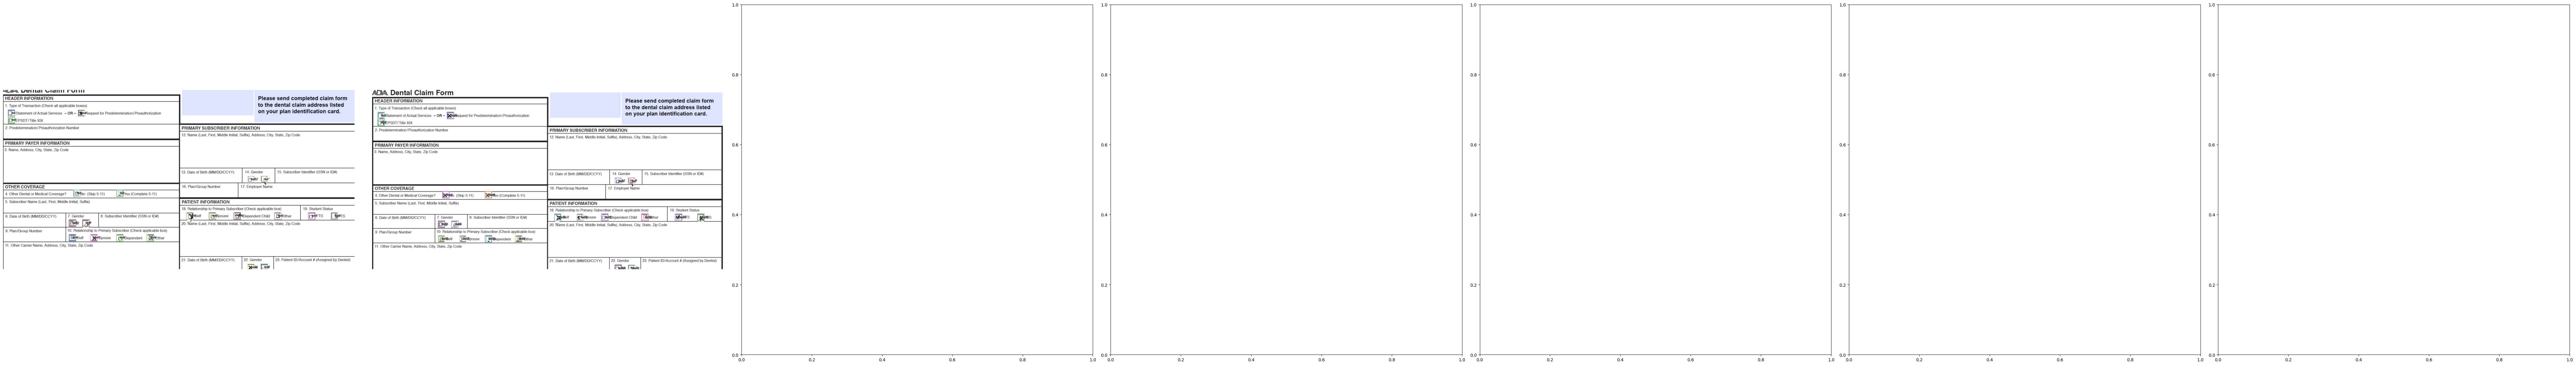

In [ ]:
from icevision.all import *
data_dir = Path('drive/My Drive/icevision/test5')
images_dir = data_dir / 'images'
annotations_dir = data_dir / 'annotations'
class_map = ClassMap(['YES1','NO1','YES2','NO2','YES3','NO3','YES4','NO4','YES5','NO5','YES6','NO6','YES7','NO7','YES8','NO8','YES9','NO9',
                      'YES10','NO10','YES11','NO11','YES12','NO12','YES13','NO13','YES14','NO14','YES15','NO15','YES16','NO16','YES17','NO17',
                      'YES18','NO18','YES19','NO19','YES20','NO20','YES21','NO21'])
parser = parsers.voc(annotations_dir=annotations_dir, images_dir=images_dir, class_map=class_map)
data_splitter = RandomSplitter((.8, .2))
#print(len(train_records))
train_records, valid_records = parser.parse(data_splitter)
show_records(train_records[0:2], ncols=7, class_map=class_map)

In [ ]:
image_size = 384
train_tfms = tfms.A.Adapter([*tfms.A.aug_tfms(size=image_size, presize=512), tfms.A.Normalize()])
valid_tfms = tfms.A.Adapter([*tfms.A.resize_and_pad(image_size), tfms.A.Normalize()])
train_ds = Dataset(train_records, train_tfms)
valid_ds = Dataset(valid_records, valid_tfms)

In [ ]:
extra_args = {}
model_type = models.mmdet.retinanet
backbone = model_type.backbones.resnet50_fpn_1x
model_type, backbone, extra_args

(<module 'icevision.models.mmdet.models.retinanet' from '/usr/local/lib/python3.7/dist-packages/icevision/models/mmdet/models/retinanet/__init__.py'>,
 {})

In [ ]:
model = model_type.model(backbone=backbone(pretrained=True), num_classes=len(parser.class_map), **extra_args) 

  0%|          | 0/152149505 [00:00<?, ?B/s]

/usr/local/lib/python3.7/dist-packages/mmcv/cnn/utils/weight_init.py:119: UserWarning: init_cfg without layer key, if you do not define override key either, this init_cfg will do nothing
  'init_cfg without layer key, if you do not define override'


Use load_from_local loader
The model and loaded state dict do not match exactly

size mismatch for bbox_head.retina_cls.weight: copying a param with shape torch.Size([720, 256, 3, 3]) from checkpoint, the shape in current model is torch.Size([378, 256, 3, 3]).
size mismatch for bbox_head.retina_cls.bias: copying a param with shape torch.Size([720]) from checkpoint, the shape in current model is torch.Size([378]).


/usr/local/lib/python3.7/dist-packages/torch/utils/data/dataloader.py:477: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  cpuset_checked))


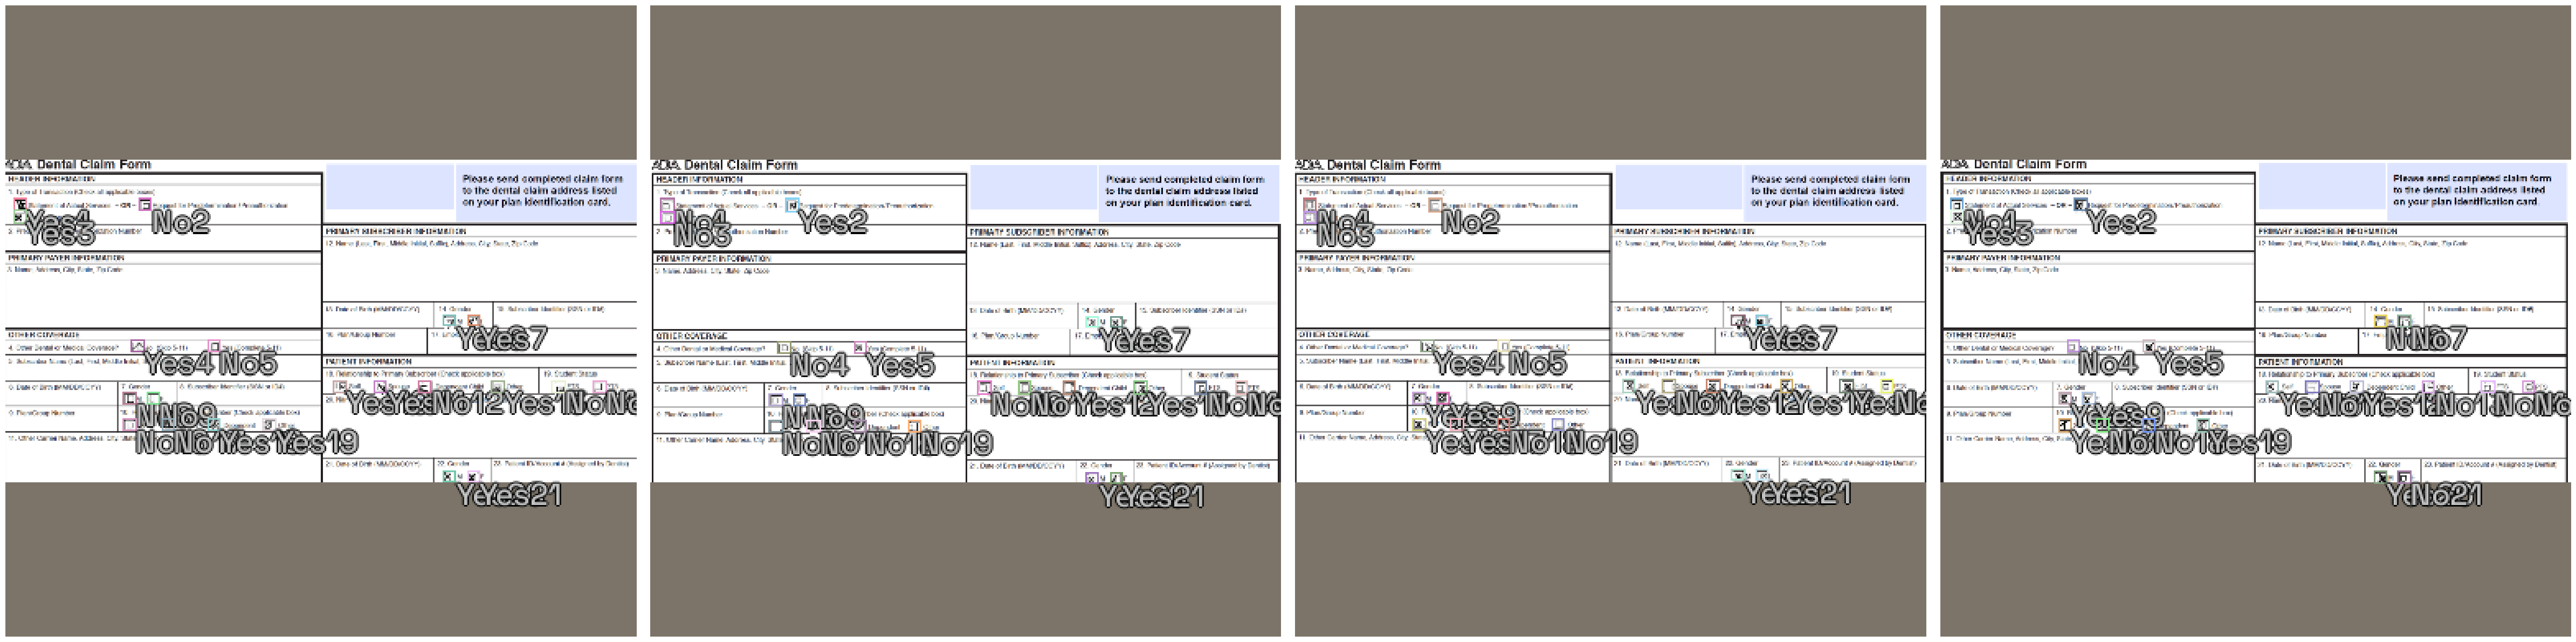

In [ ]:
train_dl = model_type.train_dl(train_ds, batch_size=4, num_workers=4, shuffle=True)
valid_dl = model_type.valid_dl(valid_ds, batch_size=4, num_workers=4, shuffle=False)
model_type.show_batch(first(valid_dl), ncols=4)

SuggestedLRs(lr_min=2.7542287716642023e-05, lr_steep=6.309573450380412e-07)

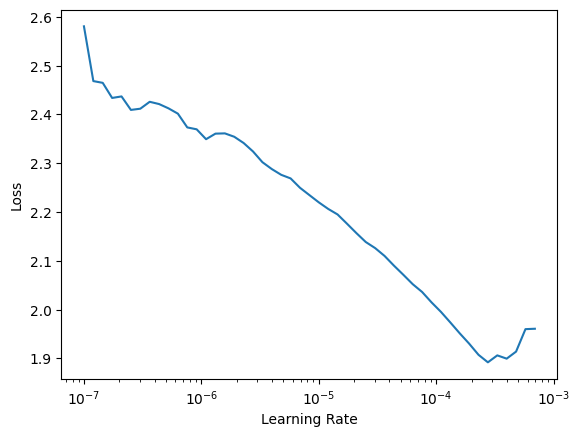

In [ ]:
metrics = [COCOMetric(metric_type=COCOMetricType.bbox)]
learn = model_type.fastai.learner(dls=[train_dl, valid_dl], model=model, metrics=metrics)
learn.lr_find()

In [ ]:
learn.fine_tune(50, 1e-4, freeze_epochs=3)

epoch,train_loss,valid_loss,COCOMetric,time
0,0.626439,0.618029,0.041345,01:13
1,0.533165,0.536182,0.074089,01:15
2,0.482752,0.392862,0.148086,01:13


epoch,train_loss,valid_loss,COCOMetric,time
0,0.391124,0.327425,0.180011,01:16
1,0.361574,0.314915,0.193383,01:16
2,0.347907,0.349509,0.227021,01:17
3,0.333020,0.299198,0.232936,01:18
4,0.326840,0.282654,0.241253,01:17
5,0.306332,0.267992,0.284142,01:16
6,0.300348,0.267807,0.306040,01:18
7,0.299931,0.267472,0.300406,01:18
8,0.289657,0.270539,0.338791,01:17
9,0.280598,0.248910,0.307895,01:18


In [ ]:
infer_dl = model_type.infer_dl(valid_ds, batch_size=1, shuffle=False)
preds = model_type.predict_from_dl(model, infer_dl, detection_threshold=0.35, keep_images=True)

  0%|          | 0/200 [00:00<?, ?it/s]

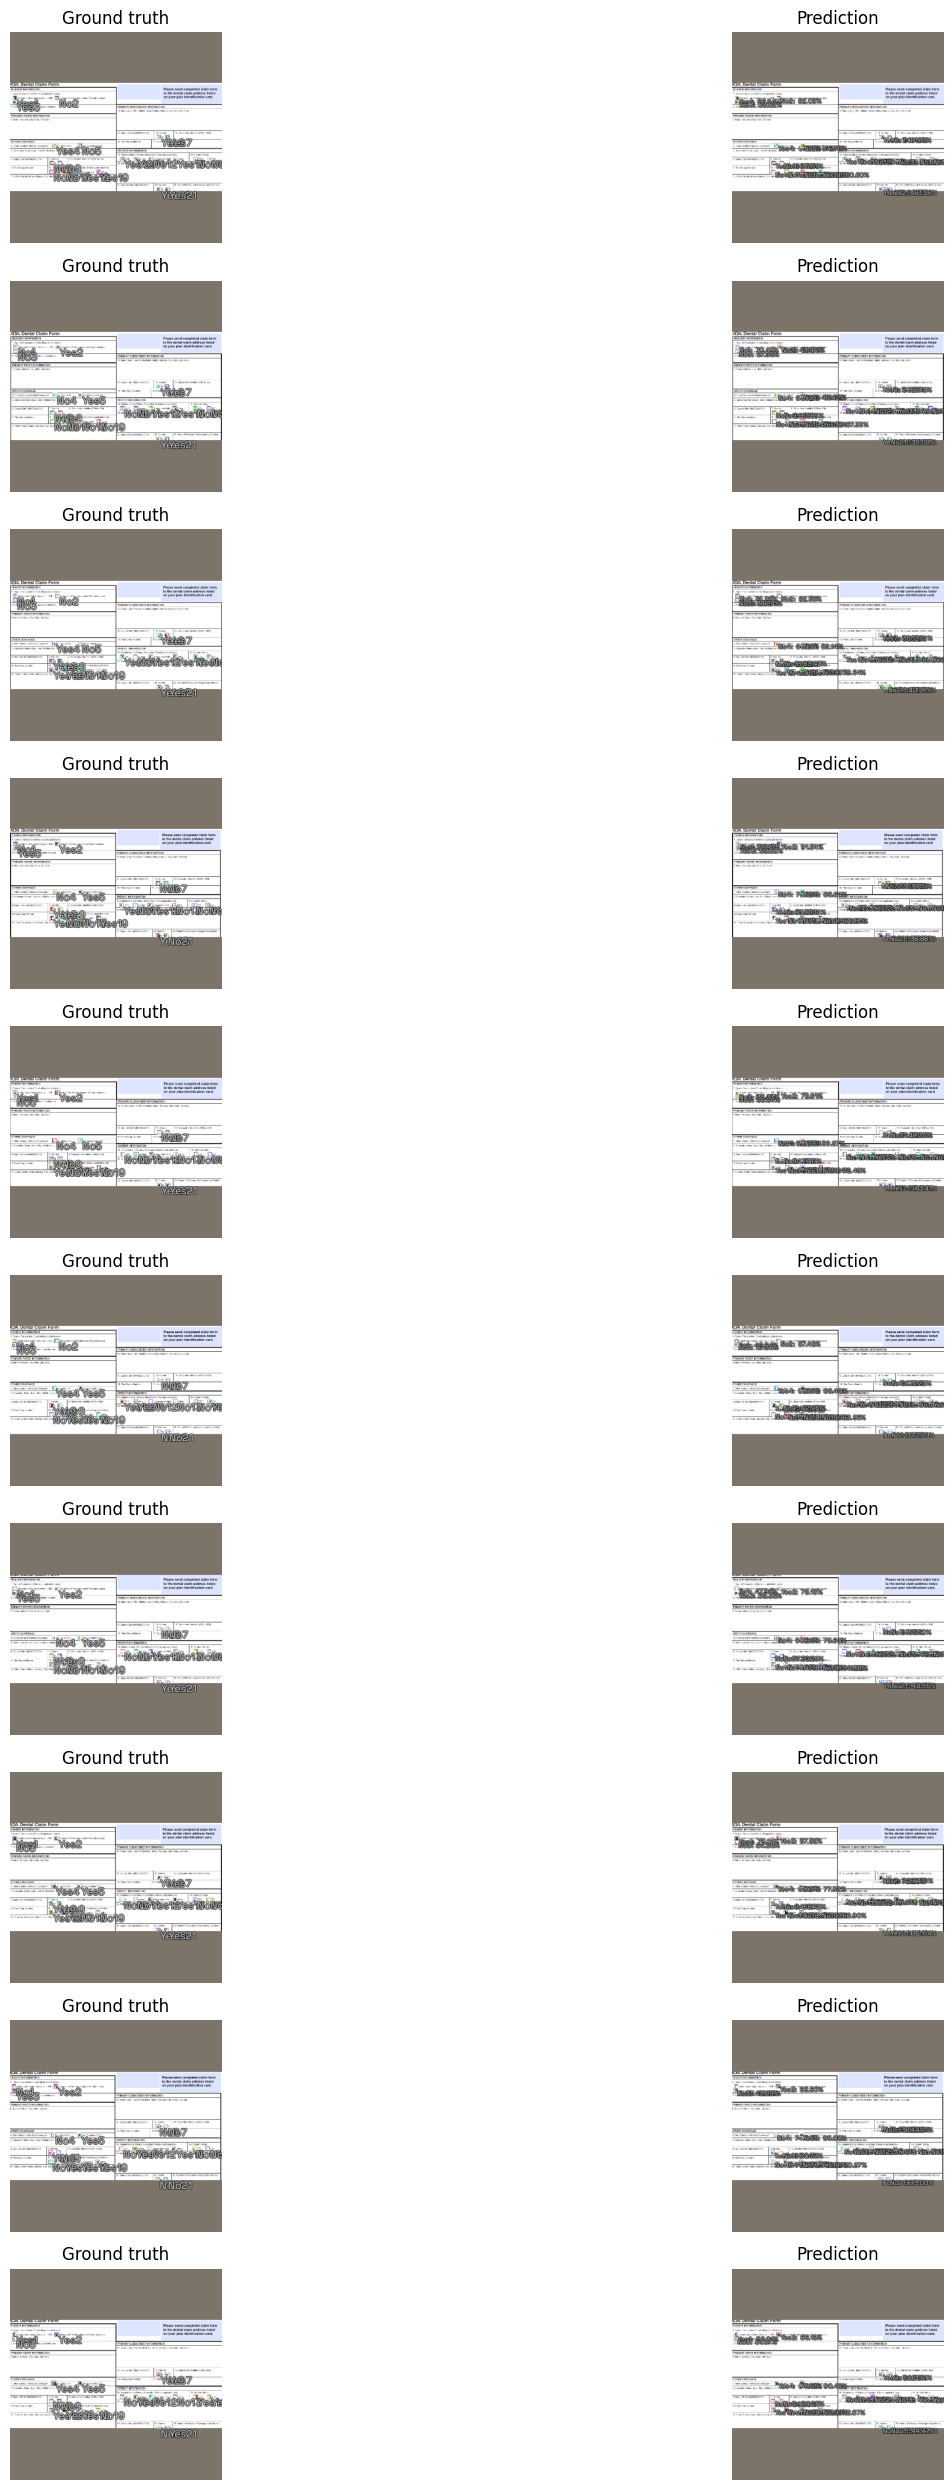

In [ ]:
N = 10
show_preds(preds=preds[:N], figsize=(20,int(2.5*N)), ncols=2)

In [ ]:
!pip install torch_snippets
from torch_snippets import load_torch_model_weights_to, save_torch_model_weights_from, makedir
makedir('drive/My Drive/icevision')
save_torch_model_weights_from(model, 'MMdetection.pth')

     |████████████████████████████████| 209 kB 11.2 MB/s 
     |████████████████████████████████| 51 kB 7.0 MB/s 


WARNING  - sklearn is not found. Skipping relevant imports from submodule `sklegos`
Exception: No module named 'sklego' | torch_snippets:<module>:14
INFO     - Saved weights of size ~142 MB to MMdetection.pth | __main__:<module>:4
